In [1]:
import pandas as pd
from statsmodels.tsa.ardl import ardl_select_order
from statsmodels.tsa.ardl import ARDL
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.append("../src/model")
from ARDL_model import *

sys.path.append("../src/plot_helper")
from ARDL_plot_helper import *


DATA_PATH = "../data/CLEAN"

# ARDL function - violence offense counts per week for all states together - "normal" box office revenue

### We just count all number of crimes in all states and add them up per week
### Just counting for timespan 2008 - 2012, since for this we have roughly consecutive data for all states (except Pennsylvania)

In [ ]:
# Load the final box office data into a dataframe
df_box_offices = pd.read_csv(DATA_PATH+"/Violent_Movies_final.tsv", sep="\t")

# Model 1: load the simple violent offenses count into dataframe -> here: for all states merged
df_real_violence = pd.read_csv(DATA_PATH+"/FBI_91_12/00_All_States_Merged/violence_scores_merged.csv", sep=",")

In [ ]:
# cut the real_violence dataframe to only include years from 2008 onwards -> to ensure we have complete data for all states
df_real_violence_cut = df_real_violence[df_real_violence['Year'] >= 2008]

In [ ]:
# create ARDL model with optimal lags and include time-fixed effects
model_1_with_TFE_all_states = ARDL_model_func(df_box_offices, df_real_violence_cut, time_fixed_effects=True)

In [ ]:
# extract the fitted model summary data, return the results dataframe and also store as HTML table (inside function) for embedding into website
results_1_with_TFE_all_states = extract_model_results(model_1_with_TFE_all_states, "Model 1 with TFE all states", "../data/CLEAN/")

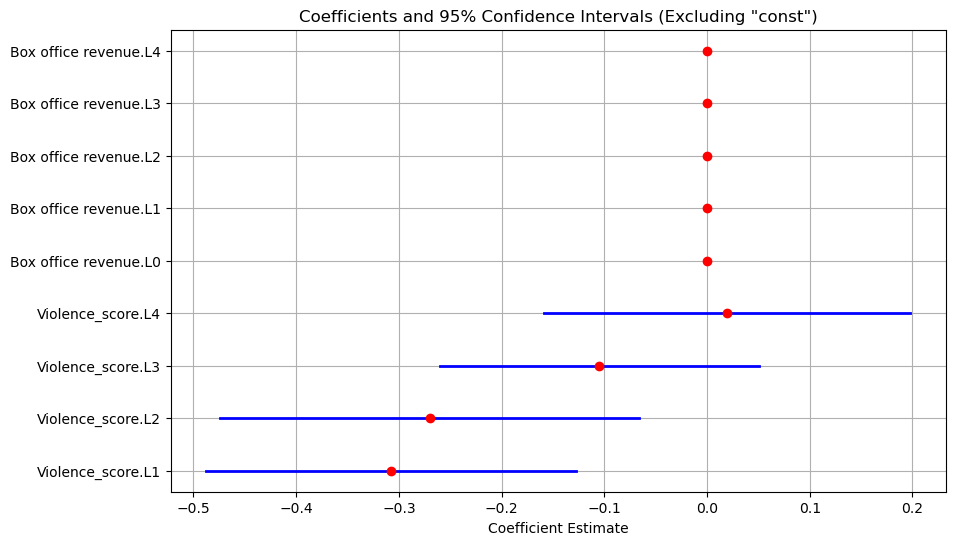

In [ ]:
# Plot the 95% confidence intervals for all important coefficients
plot_coefficients_with_confidence_intervals(results_1_with_TFE_all_states)

In [ ]:
# print the fitted model summary
model_1_with_TFE_all_states.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:         Violence_score   No. Observations:                  252
Model:                     ARDL(4, 4)   Log Likelihood               -2153.807
Method:               Conditional MLE   S.D. of innovations           1430.483
Date:                Fri, 20 Dec 2024   AIC                           4581.614
Time:                        11:19:06   BIC                           5062.954
Sample:                             4   HQIC                          4775.383
                                  252                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.316e+04   1.47e+04      6.326      0.000     6.4e+04    1.22e+05
Violence_score.L1        -0.3075      0.092     -3.331      0.001      -0.490      -0.125
Violence_score.L2        -0.2700      0.104     -2.607      0.010      -0.475      -0.065
Violence_score.L3        -0.1047      0.079     -1.326      0.188      -0.261       0.052
Violence_score.L4         0.0197      0.091      0.217      0.828      -0.160       0.200
Box office revenue.L0 -8.929e-07   7.44e-07     -1.201      0.232   -2.37e-06    5.81e-07
Box office revenue.L1 -1.221e-07   1.04e-06     -0.117      0.907   -2.18e-06    1.94e-06
Box office revenue.L2 -4.379e-07   1.08e-06     -0.406      0.686   -2.58e-06     1.7e-06
Box office revenue.L3 -5.256e-07   1.04e-06     -0.504      0.615   -2.59e-06    1.54e-06
Box office revenue.L4 -1.874e-09   6.69e-07     -0.003      0.998   -1.33e-06    1.32e-06
2008-B10               1184.3167   1598.284      0.741      0.460   -1982.479    4351.112
2008-B11               3768.8343   1579.164      2.387      0.019     639.922    6897.746
2008-B12               4838.6340   1696.423      2.852      0.005    1477.390    8199.878
2008-B13               4667.5413   1700.282      2.745      0.007    1298.651    8036.431
2008-B14               6931.2392   1702.078      4.072      0.000    3558.790    1.03e+04
2008-B15               8273.3794   2048.986      4.038      0.000    4213.577    1.23e+04
2008-B16               8667.3576   2171.628      3.991      0.000    4364.555     1.3e+04
2008-B17               6548.6522   1937.457      3.380      0.001    2709.829    1.04e+04
2008-B18               5174.3037   1814.643      2.851      0.005    1578.820    8769.787
2008-B19               4809.4550   1714.435      2.805      0.006    1412.522    8206.388
2008-B2                7.097e-11   2.06e-10      0.345      0.731   -3.37e-10    4.79e-10
2008-B20               5209.9450   1699.019      3.066      0.003    1843.557    8576.333
2008-B21               3217.9275   1762.067      1.826      0.070    -273.382    6709.236
2008-B22                422.9834   1656.959      0.255      0.799   -2860.069    3706.036
2008-B23              -3866.1271   1508.319     -2.563      0.012   -6854.668    -877.586
2008-B24              -9746.2797   1678.821     -5.805      0.000   -1.31e+04   -6419.911
2008-B25              -1.092e+04   2158.424     -5.060      0.000   -1.52e+04   -6645.707
2008-B26              -1.565e+04   2425.212     -6.454      0.000   -2.05e+04   -1.08e+04
2008-B3               -1.421e+04   2179.264     -6.522      0.000   -1.85e+04   -9894.981
2008-B4                -1.65e+04   2802.326     -5.888      0.000   -2.21e+04   -1.09e+04
2008-B5               -1.371e+04   2877.963     -4.764      0.000   -1.94e+04   -8007.653
2008-B6               -9625.7663   2648.110     -3.635      0.000   -1.49e+04   -4378.876
2008-B7               -5827.2346   2187.948     -2.663      0.009   -1.02e+04   -1492.096
2

In [17]:
model_1_without_TFE_all_states = ARDL_model_func(df_box_offices, df_real_violence_cut, time_fixed_effects=False)

In [18]:
results_1_without_TFE_all_states = extract_model_results(model_1_without_TFE_all_states, "Model 1 without TFE all states", "../data/CLEAN/")

In [19]:
results_1_without_TFE_all_states

,variable,coefficient,std_err,p_value,lower_ci,upper_ci
0,const,5.655791e+03,2.055854e+03,0.006,1.626318e+03,9.685265e+03
1,Violence_score.L1,6.511000e-01,6.400000e-02,0.000,5.256600e-01,7.765400e-01
2,Violence_score.L2,8.790000e-02,7.500000e-02,0.240,-5.910000e-02,2.349000e-01
3,Violence_score.L3,3.980000e-02,7.400000e-02,0.589,-1.052400e-01,1.848400e-01
4,Violence_score.L4,1.253000e-01,6.100000e-02,0.040,5.740000e-03,2.448600e-01
5,Box office revenue.L0,-1.090000e-07,6.250000e-07,0.862,-1.334000e-06,1.116000e-06
6,Box office revenue.L1,-4.678000e-09,6.250000e-07,0.994,-1.229678e-06,1.220322e-06
7,Box office revenue.L2,2.466000e-07,6.260000e-07,0.694,-9.803600e-07,1.473560e-06
8,Box office revenue.L3,-1.942000e-06,6.260000e-07,0.002,-3.168960e-06,-7.150400e-07
9,Box office revenue.L4,1.085000e-06,6.380000e-07,0.091,-1.654800e-07,2.335480e-06


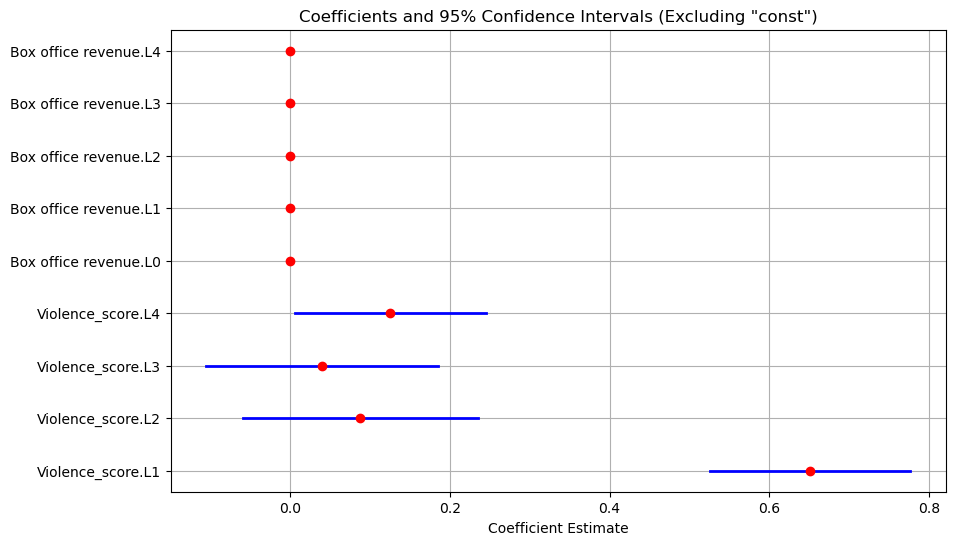

In [20]:
plot_coefficients_with_confidence_intervals(results_1_without_TFE_all_states)

In [21]:
model_1_without_TFE_all_states.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:         Violence_score   No. Observations:                  252
Model:                     ARDL(4, 4)   Log Likelihood               -2360.512
Method:               Conditional MLE   S.D. of innovations           3292.018
Date:                Fri, 20 Dec 2024   AIC                           4743.024
Time:                        11:19:46   BIC                           4781.672
Sample:                             4   HQIC                          4758.583
                                  252                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5655.7914   2055.854      2.751      0.006    1605.796    9705.786
Violence_score.L1         0.6511      0.064     10.182      0.000       0.525       0.777
Violence_score.L2         0.0879      0.075      1.178      0.240      -0.059       0.235
Violence_score.L3         0.0398      0.074      0.541      0.589      -0.105       0.185
Violence_score.L4         0.1253      0.061      2.068      0.040       0.006       0.245
Box office revenue.L0  -1.09e-07   6.25e-07     -0.174      0.862   -1.34e-06    1.12e-06
Box office revenue.L1 -4.678e-09   6.25e-07     -0.007      0.994   -1.24e-06    1.23e-06
Box office revenue.L2  2.466e-07   6.26e-07      0.394      0.694   -9.87e-07    1.48e-06
Box office revenue.L3 -1.942e-06   6.26e-07     -3.100      0.002   -3.18e-06   -7.08e-07
Box office revenue.L4  1.085e-06   6.38e-07      1.699      0.091   -1.73e-07    2.34e-06
=========================================================================================
"""

# ARDL function - fitted ARDL models for all states (except Pennsylvania) separately (according to their corresponding consecutive years)
# Violence counts per state - "normal" box office revenue

### returns a dictionary of fitted ARDL models

In [22]:
DIRECTORY_PATH = DATA_PATH + "/FBI_91_12/01_States_Separately"

In [23]:
df_box_offices = pd.read_csv(DATA_PATH+"/Violent_Movies_final.tsv", sep="\t")

In [24]:
consecutive_years_per_state = pd.read_csv(DATA_PATH+"/FBI_91_12/02_Consecutive_Years_States/Consecutive_years_states.tsv", sep="\t")

In [28]:
fitted_ARDL_models = ARDL_states_separate(DIRECTORY_PATH, df_box_offices, consecutive_years_per_state, ARDL_model_func, time_fixed_effects=True)

In [29]:
model_1_with_TFE_single_state = fitted_ARDL_models["ARDL_NorthDakota"]

In [32]:
results_1_with_TFE_single_state = extract_model_results(model_1_with_TFE_single_state, "Model 1 with TFE single state", "../data/CLEAN/")

In [33]:
results_1_with_TFE_single_state

,variable,coefficient,std_err,p_value,lower_ci,upper_ci
0,const,549.5174,34.923,0.000,481.06832,617.96648
1,Violence_score.L1,-0.4859,0.043,0.000,-0.57018,-0.40162
2,Violence_score.L2,-0.3017,0.048,0.000,-0.39578,-0.20762
3,Violence_score.L3,-0.2064,0.047,0.000,-0.29852,-0.11428
4,Violence_score.L4,-0.0775,0.043,0.075,-0.16178,0.00678
5,no. films released.L0,-0.3444,0.949,0.717,-2.20444,1.51564
6,no. films released.L1,-1.0943,1.208,0.365,-3.46198,1.27338
7,no. films released.L2,-1.2207,1.297,0.347,-3.76282,1.32142
8,no. films released.L3,-1.6661,1.301,0.201,-4.21606,0.88386
9,no. films released.L4,-1.8296,1.321,0.167,-4.41876,0.75956


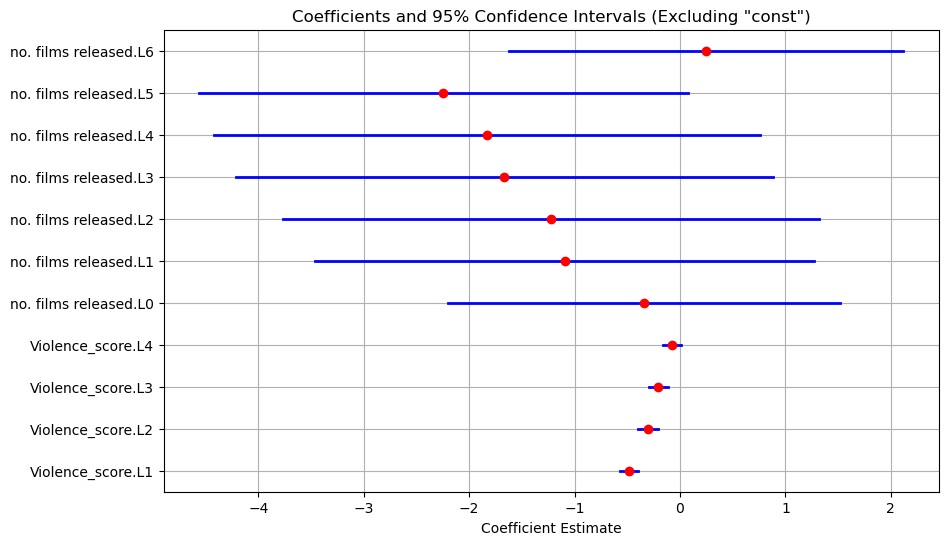

In [34]:
plot_coefficients_with_confidence_intervals(results_1_with_TFE_single_state)

In [30]:
model_1_with_TFE_single_state.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:         Violence_score   No. Observations:                 1142
Model:                     ARDL(4, 6)   Log Likelihood               -4750.228
Method:               Conditional MLE   S.D. of innovations             15.725
Date:                Fri, 20 Dec 2024   AIC                          10674.455
Time:                        11:22:14   BIC                          13631.191
Sample:                             6   HQIC                         11791.148
                                 1142                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   549.5174     34.923     15.735      0.000     480.920     618.115
Violence_score.L1        -0.4859      0.043    -11.197      0.000      -0.571      -0.401
Violence_score.L2        -0.3017      0.048     -6.303      0.000      -0.396      -0.208
Violence_score.L3        -0.2064      0.047     -4.436      0.000      -0.298      -0.115
Violence_score.L4        -0.0775      0.043     -1.787      0.075      -0.163       0.008
no. films released.L0    -0.3444      0.949     -0.363      0.717      -2.209       1.520
no. films released.L1    -1.0943      1.208     -0.906      0.365      -3.467       1.279
no. films released.L2    -1.2207      1.297     -0.941      0.347      -3.768       1.327
no. films released.L3    -1.6661      1.301     -1.281      0.201      -4.221       0.889
no. films released.L4    -1.8296      1.321     -1.385      0.167      -4.425       0.766
no. films released.L5    -2.2448      1.183     -1.897      0.058      -4.569       0.079
no. films released.L6     0.2500      0.954      0.262      0.793      -1.623       2.123
1991-B10               -183.1911     19.708     -9.295      0.000    -221.904    -144.478
1991-B11               -124.2637     19.576     -6.348      0.000    -162.716     -85.811
1991-B12                -32.3167     17.720     -1.824      0.069     -67.124       2.491
1991-B13                 20.8599     17.074      1.222      0.222     -12.678      54.398
1991-B14                 41.5268     17.221      2.411      0.016       7.700      75.354
1991-B15                 51.1128     16.924      3.020      0.003      17.870      84.356
1991-B16                 46.1695     16.353      2.823      0.005      14.047      78.292
1991-B17                 63.1541     16.339      3.865      0.000      31.060      95.248
1991-B18                 55.9934     16.685      3.356      0.001      23.219      88.768
1991-B19                 19.3528     16.490      1.174      0.241     -13.039      51.744
1991-B2               -2.948e-14   3.26e-14     -0.903      0.367   -9.36e-14    3.46e-14
1991-B20                  2.4255     16.082      0.151      0.880     -29.165      34.016
1991-B21                 15.2502     16.047      0.950      0.342     -16.270      46.771
1991-B22                -38.8078     16.317     -2.378      0.018     -70.860      -6.756
1991-B23                -99.2861     16.845     -5.894      0.000    -132.374     -66.198
1991-B24               -128.8532     17.908     -7.195      0.000    -164.029     -93.677
1991-B25               -109.8766     17.983     -6.110      0.000    -145.201     -74.553
1991-B26               -110.4473     17.575     -6.284      0.000    -144.969     -75.925
1991-B3                4.173e-13   1.75e-13      2.381      0.018    7.31e-14    7.61e-13
1991-B4                -177.3689     20.477     -8.662      0.000    -217.592    -137.146
1991-B5                -160.5851     19.450     -8.256      0.000    -198.790    -122.381
1

In [35]:
fitted_ARDL_models = ARDL_states_separate(DIRECTORY_PATH, df_box_offices, consecutive_years_per_state, ARDL_model_func, time_fixed_effects=False)

In [36]:
model_1_without_TFE_single_state = fitted_ARDL_models["ARDL_NorthDakota"]

In [37]:
results_1_without_TFE_single_state = extract_model_results(model_1_without_TFE_single_state, "Model 1 without TFE single state", "../data/CLEAN/")

In [38]:
results_1_without_TFE_single_state

,variable,coefficient,std_err,p_value,lower_ci,upper_ci
0,const,29.3426,5.004,0.000,19.53476,39.15044
1,Violence_score.L1,0.4737,0.029,0.000,0.41686,0.53054
2,Violence_score.L2,0.2334,0.033,0.000,0.16872,0.29808
3,Violence_score.L3,0.0646,0.033,0.048,-0.00008,0.12928
4,Violence_score.L4,0.1466,0.030,0.000,0.08780,0.20540
5,no. films released.L0,-0.4213,0.690,0.541,-1.77370,0.93110
6,no. films released.L1,-1.0851,0.694,0.118,-2.44534,0.27514
7,no. films released.L2,-0.5816,0.694,0.402,-1.94184,0.77864
8,no. films released.L3,-0.9855,0.695,0.157,-2.34770,0.37670
9,no. films released.L4,-1.5215,0.692,0.028,-2.87782,-0.16518


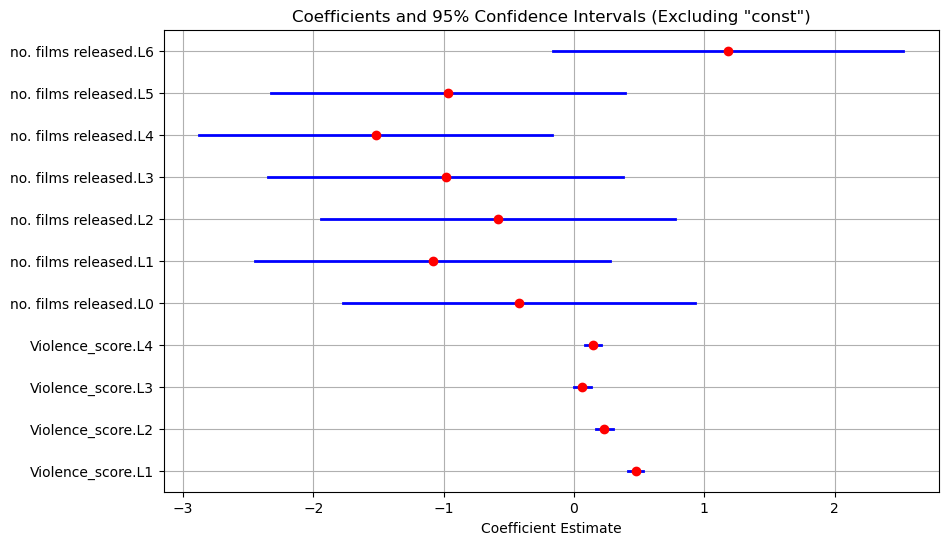

In [39]:
plot_coefficients_with_confidence_intervals(results_1_without_TFE_single_state)

In [40]:
model_1_without_TFE_single_state.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:         Violence_score   No. Observations:                 1142
Model:                     ARDL(4, 6)   Log Likelihood               -5542.235
Method:               Conditional MLE   S.D. of innovations             31.539
Date:                Fri, 20 Dec 2024   AIC                          11110.470
Time:                        11:26:53   BIC                          11175.952
Sample:                             6   HQIC                         11135.201
                                 1142                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    29.3426      5.004      5.864      0.000      19.525      39.160
Violence_score.L1         0.4737      0.029     16.059      0.000       0.416       0.532
Violence_score.L2         0.2334      0.033      7.160      0.000       0.169       0.297
Violence_score.L3         0.0646      0.033      1.981      0.048       0.001       0.129
Violence_score.L4         0.1466      0.030      4.959      0.000       0.089       0.205
no. films released.L0    -0.4213      0.690     -0.611      0.541      -1.775       0.932
no. films released.L1    -1.0851      0.694     -1.564      0.118      -2.446       0.276
no. films released.L2    -0.5816      0.694     -0.838      0.402      -1.943       0.780
no. films released.L3    -0.9855      0.695     -1.417      0.157      -2.350       0.379
no. films released.L4    -1.5215      0.692     -2.199      0.028      -2.879      -0.164
no. films released.L5    -0.9667      0.692     -1.397      0.163      -2.325       0.391
no. films released.L6     1.1820      0.687      1.720      0.086      -0.167       2.531
=========================================================================================
"""

# ARDL function - violence offense ratios per state - "normal" box office revenue

### We add up the violent crimes per state per week and divide by the total number of crimes in this state in this year
### Applied for Alabama state in the time span 2008 - 2012 (since we have consecutive data here)

In [20]:
df_real_violence_ratio = pd.read_csv(DATA_PATH+"/FBI_91_12/03_Violence_Ratio_Alabama/Violence_ratio_alabama_2008_2012.csv", sep=",")

In [21]:
test_model_2 = ARDL_model_func(df_box_offices, df_real_violence_ratio, time_fixed_effects=False)

In [23]:
test_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:         Violence_score   No. Observations:                  250
Model:                  ARDL(4, 0, 2)   Log Likelihood                1066.999
Method:               Conditional MLE   S.D. of innovations              0.003
Date:                Mon, 16 Dec 2024   AIC                          -2113.998
Time:                        15:33:25   BIC                          -2078.945
Sample:                             4   HQIC                         -2099.884
                                  250                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0122      0.002      6.360      0.000       0.008       0.016
Violence_score.L1         0.1339      0.062      2.162      0.032       0.012       0.256
Violence_score.L2         0.0821      0.063      1.313      0.190      -0.041       0.205
Violence_score.L3        -0.0144      0.063     -0.229      0.819      -0.138       0.109
Violence_score.L4         0.1654      0.062      2.653      0.009       0.043       0.288
no. films released.L0    -0.0004      0.000     -3.337      0.001      -0.001      -0.000
Box office revenue.L0  1.077e-12   6.16e-13      1.748      0.082   -1.37e-13    2.29e-12
Box office revenue.L1  8.254e-13   6.08e-13      1.357      0.176   -3.73e-13    2.02e-12
Box office revenue.L2  1.186e-12    6.1e-13      1.945      0.053   -1.55e-14    2.39e-12
=========================================================================================
"""

# ARDL function - violence counts per state - normalized box office revenue from Jade

### We count all violent crimes in one state, add them up weekly
### Normalizing box office revenue as proposed by Jade
### Applied for Alabama state in the time span 2008 - 2012 (since we have consecutive data here)

In [3]:
score_jade = pd.read_csv(DATA_PATH+"/movie_violence_metric.csv", sep=",")

In [4]:
score_jade.head()

,Year,Week,Metric
0,1901,8,1.0
1,1903,49,1.0
2,1908,10,1.0
3,1908,29,1.0
4,1908,30,1.0


In [5]:
df_real_violence = pd.read_csv(DATA_PATH+"/FBI_91_12/00_All_States_Merged/violence_scores_merged.csv", sep=",")

In [6]:
test_model = ARDL_model_func_jade(score_jade, df_real_violence, time_fixed_effects=False)

In [7]:
test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:         Violence_score   No. Observations:                 1152
Model:                     ARDL(9, 1)   Log Likelihood              -10602.728
Method:               Conditional MLE   S.D. of innovations           2584.505
Date:                Mon, 16 Dec 2024   AIC                          21231.457
Time:                        15:45:02   BIC                          21296.995
Sample:                             9   HQIC                         21256.204
                                 1152                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               275.9903    163.282      1.690      0.091     -44.380     596.361
Violence_score.L1     0.5738      0.030     19.352      0.000       0.516       0.632
Violence_score.L2     0.1293      0.034      3.775      0.000       0.062       0.196
Violence_score.L3     0.1041      0.034      3.023      0.003       0.037       0.172
Violence_score.L4     0.1648      0.035      4.773      0.000       0.097       0.233
Violence_score.L5     0.0381      0.035      1.091      0.276      -0.030       0.107
Violence_score.L6     0.0588      0.035      1.696      0.090      -0.009       0.127
Violence_score.L7    -0.0021      0.035     -0.061      0.951      -0.070       0.066
Violence_score.L8     0.0110      0.034      0.320      0.749      -0.056       0.078
Violence_score.L9    -0.0845      0.030     -2.834      0.005      -0.143      -0.026
Metric.L0             2.8666      6.123      0.468      0.640      -9.147      14.880
Metric.L1             0.0820      6.117      0.013      0.989     -11.920      12.084
=====================================================================================
"""

# ARDL function - violence offense z score - "normal" box office revenue

### We calculate the z score (by Jen) for one state, end up with one z-score per week
### Applied for Alabama state in the time span 2008 - 2012 (since we have consecutive data here)

In [8]:
df_real_violence_z = pd.read_csv(DATA_PATH+"/FBI_91_12/04_Violence_z_Alabama/Violence_z_alabama_2008_2012.csv", sep=",")

In [9]:
test_model_3 = ARDL_model_func(df_box_offices, df_real_violence_z, time_fixed_effects=False)

In [10]:
test_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:         Violence_score   No. Observations:                  250
Model:                     ARDL(2, 0)   Log Likelihood                -296.644
Method:               Conditional MLE   S.D. of innovations              0.800
Date:                Mon, 16 Dec 2024   AIC                            603.288
Time:                        16:27:38   BIC                            620.855
Sample:                             2   HQIC                           610.360
                                  250                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1121      0.080      1.406      0.161      -0.045       0.269
Violence_score.L1        -0.3409      0.063     -5.450      0.000      -0.464      -0.218
Violence_score.L2        -0.1819      0.062     -2.916      0.004      -0.305      -0.059
no. films released.L0    -0.0670      0.030     -2.201      0.029      -0.127      -0.007
=========================================================================================
"""

# ARDL function - violence z-score (by Jen) - normalized box office revenue from Jade

### We compute z-score for all states separately, add them up by week and year
### Normalizing box office revenue as proposed by Jade
### Applied for all states (except Pennsylvania) in the time frame 2008 - 2012

In [3]:
DIRECTORY_PATH_2 = "../data/RAW/FBI_91_12"

In [4]:
z_scores_merged = z_score_all_states_merged(DIRECTORY_PATH_2, start_year = 2008, end_year = 2012, start_week = 1, stop_week = 52)

In [5]:
z_scores_merged.isna().any().any()

False

In [6]:
final_model = ARDL_model_func(df_box_offices, z_scores_merged, time_fixed_effects=False)

In [7]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:         Violence_score   No. Observations:                  250
Model:                       ARDL(4,)   Log Likelihood               -1205.510
Method:               Conditional MLE   S.D. of innovations             32.509
Date:                Mon, 16 Dec 2024   AIC                           2423.019
Time:                        21:55:00   BIC                           2444.051
Sample:                             4   HQIC                          2431.488
                                  250                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1155      2.095     -0.055      0.956      -4.242       4.011
Violence_score.L1     0.3151      0.063      4.968      0.000       0.190       0.440
Violence_score.L2     0.2204      0.066      3.314      0.001       0.089       0.351
Violence_score.L3    -0.1178      0.066     -1.777      0.077      -0.249       0.013
Violence_score.L4     0.1721      0.063      2.720      0.007       0.047       0.297
=====================================================================================
"""